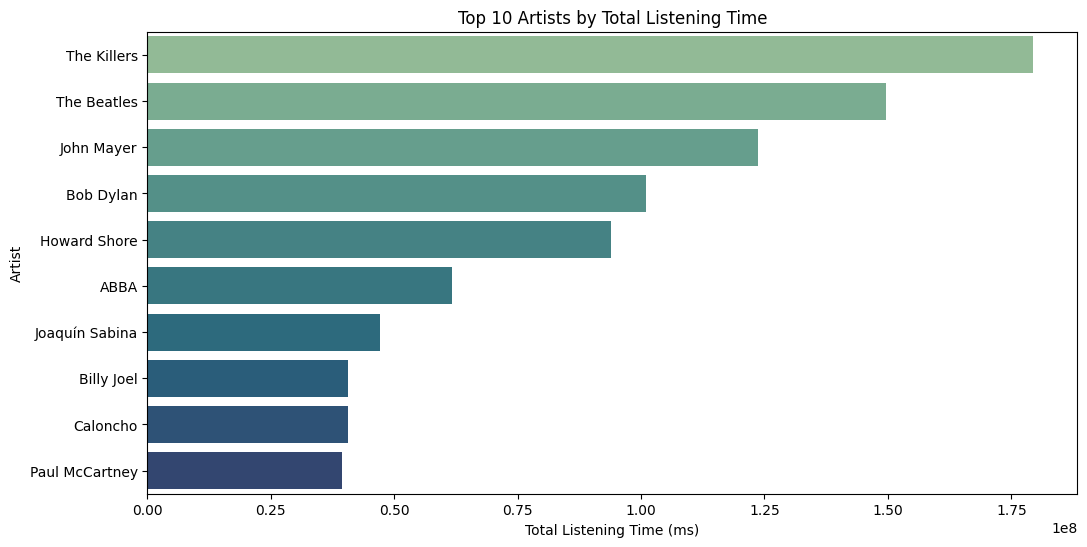

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

top_artists = df.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_artists.index, x=top_artists.values, hue=top_artists.index, palette="crest", legend=False)
plt.title("Top 10 Artists by Total Listening Time")
plt.xlabel("Total Listening Time (ms)")
plt.ylabel("Artist")
plt.show()


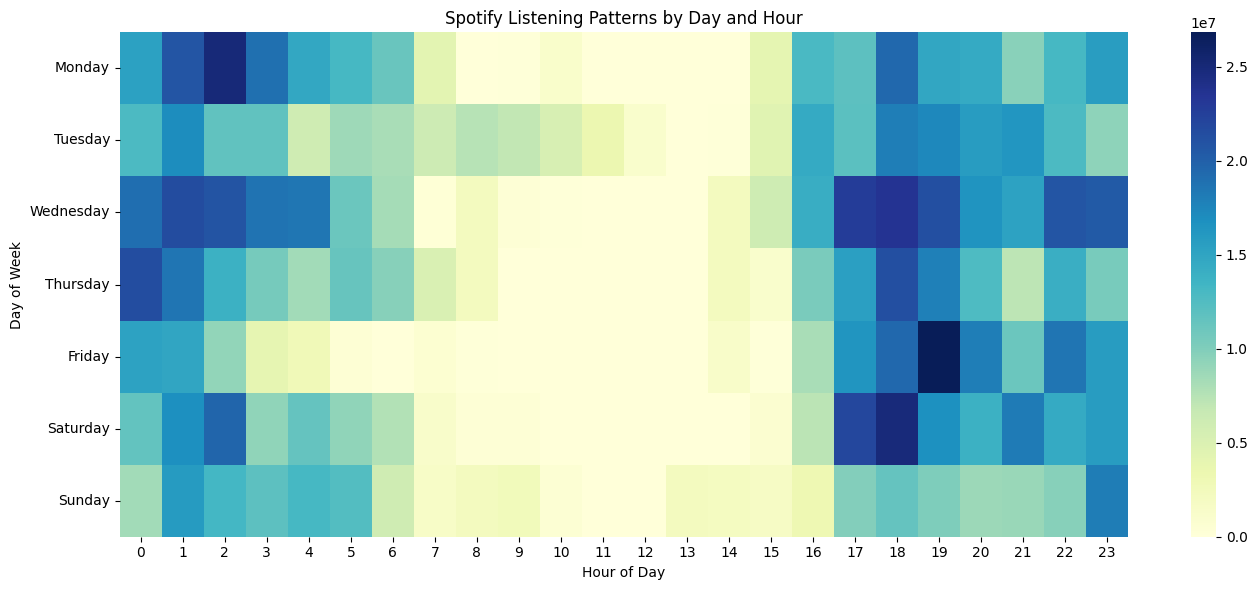

In [14]:

#heatmap of Spotify listening patterns by day and hour from your dataset.
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned CSV file
df = pd.read_csv("spotify_2023-latest.csv")

# Safely convert timestamps
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')

# Drop rows with invalid/missing timestamps and create a copy to avoid warnings
df = df.dropna(subset=['ts']).copy()

# Extract hour and day of week
df['hour'] = df['ts'].dt.hour
df['day'] = df['ts'].dt.day_name()

# Create pivot table: rows = days, columns = hours, values = total ms_played
heatmap_data = df.pivot_table(
    index='day',
    columns='hour',
    values='ms_played',
    aggfunc='sum'
).fillna(0)

# Order days for better presentation
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Spotify Listening Patterns by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()



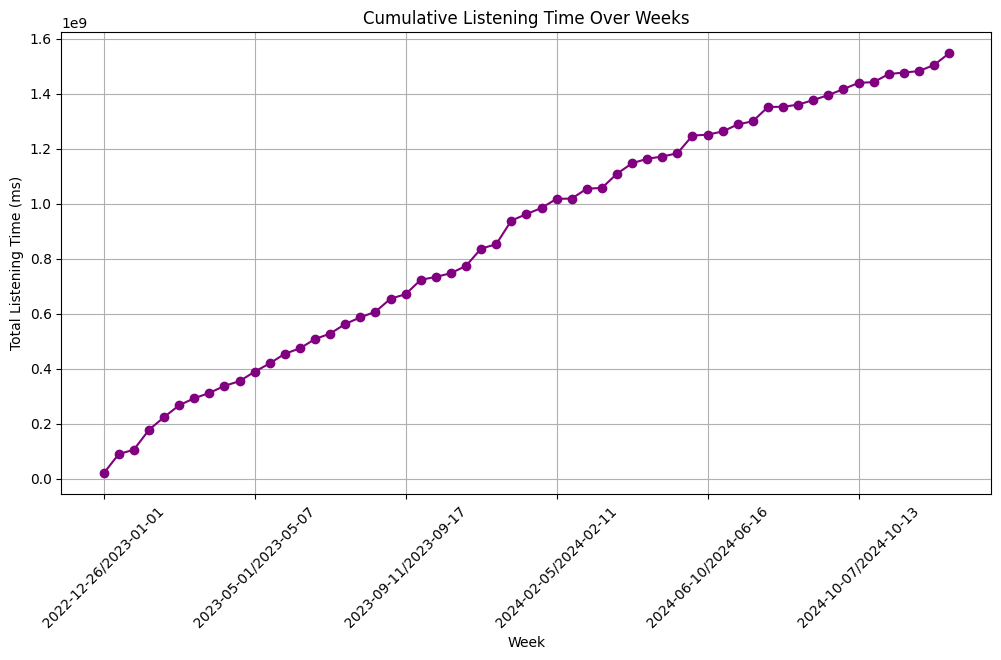

In [15]:
df['week'] = df['ts'].dt.to_period('W').astype(str)
weekly = df.groupby('week')['ms_played'].sum().cumsum()

plt.figure(figsize=(12,6))
weekly.plot(marker='o', color='purple')
plt.title("Cumulative Listening Time Over Weeks")
plt.xlabel("Week")
plt.ylabel("Total Listening Time (ms)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


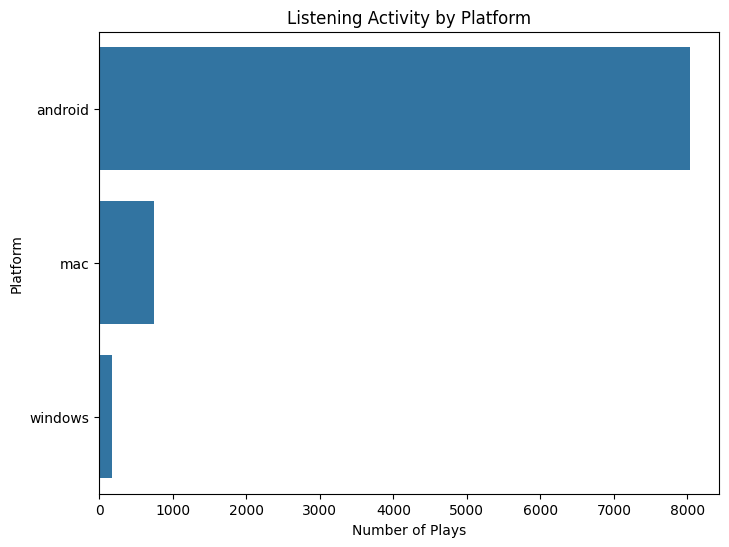

In [21]:
platform_usage = df['platform'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=platform_usage.values, y=platform_usage.index)
plt.title("Listening Activity by Platform")
plt.xlabel("Number of Plays")
plt.ylabel("Platform")
plt.show()


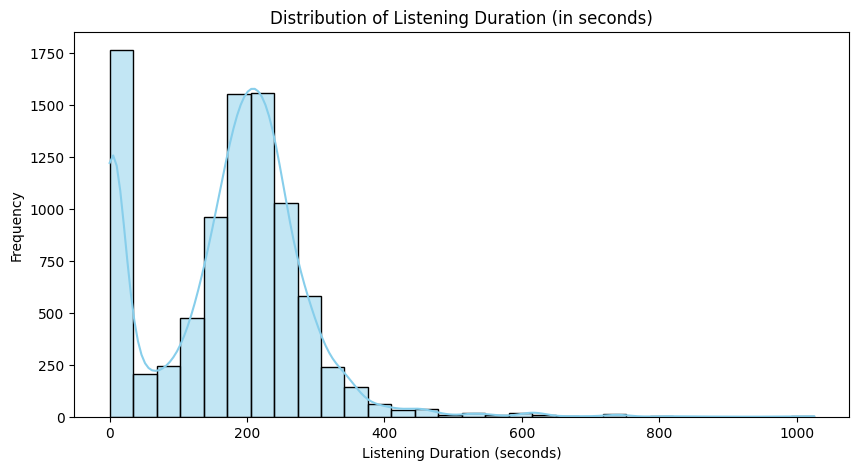

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df['ms_played'] / 1000, bins=30, kde=True, color='skyblue')
plt.title("Distribution of Listening Duration (in seconds)")
plt.xlabel("Listening Duration (seconds)")
plt.ylabel("Frequency")
plt.show()
